In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import random

# K Means Clustering

### We start with the initial algorithm. We start by initializing k centroids. This can be done various ways and I will use 2, a basic random pick and a slightly more thought out approach to avoid picking 2 similar centroids. After we have the initial centroids, we assign each point to the closest centroid and label it as part of that cluster. We then recalculate the middle points, or centroids of those new clusters and repeat the process again. This is repeated until there is no change in the centroids.

In [203]:
def kMeans(df: pd.DataFrame, k: int, initialize: str = "k++") -> pd.DataFrame:
    """Perform k means clustering"""
    
    kdf = df.copy()
        
    # 1. Initialize centroids
    if initialize == "random":
        centroids = init_centroids_random(kdf, k)
    else:
        centroids = init_centroids_k_plus(kdf, k)
        
    centroids_initial = centroids.copy()
        
    print("Clusters:")
    print(centroids)
    
    # Perform clustering until no more change
    i=0
    while True:
        i += 1
        print("Cluster Iteration ", i)
        print("Current Centroids\n", centroids)
        
        # 2. Compute distance from points to the centroids & Assign to a cluster
        kdf["cluster"] = kdf.apply(nearest_cluster, centroids=centroids, axis=1)
        print(kdf)

        # 3. Calculate new clusters based on mean of current
        last_centoids = centroids
        centroids = kdf.groupby("cluster").mean()
        
        # Repeat if not done
        if last_centoids.equals(centroids):
            print(f"Clustering Complete after {i} iterations")
            break

    return kdf

In [204]:
def nearest_cluster(df_row1: pd.Series, centroids: pd.DataFrame):
    """For each row, assign which is the closest centroid"""
    diff = (centroids-df_row1)**2
    diff = diff.apply(np.sum, axis=1)

    return diff.idxmin()

In [205]:
def init_centroids_random(df: pd.DataFrame, k: int) -> pd.Series:
    """Initialze Centroids by choosing k random points"""
    # Random points
    df_range = range(0, len(df))
    rand_rows = random.sample(df_range, k)
    centroids = df.iloc[rand_rows].reset_index(drop=True)
    print("Initial Random Centroids Found @\n", centroids)
    return centroids

In [194]:
def init_centroids_k_plus(data: pd.DataFrame, k: int) -> pd.Series:
    '''
        Initialize one point at random.
        Loop for k - 1 iterations:
            Calculate for each point, the distance of the point from its nearest center. Sample a point with a 
            probability proportional to the square of the distance of the point from its nearest center.
    '''
    df = data.copy()
    df_range = range(0, len(df))
    rand_row = random.sample(df_range, 1)
    centroids = df.iloc[rand_row].reset_index(drop=True)
    df.drop(rand_row[0], inplace=True)
    df.reset_index(drop=True, inplace=True)
    print("Initial Centroid Found for K++ method @\n", centroids)
    print(df)
    
    max_dist = {"index": 1, "distance": 0}
    
    for i in range(1, k):
        # Loop and select the remaining points
        print(f"Starting iteration {i} with {len(centroids)} already defined")
        print("Current Centroids:")
        print(centroids)
        
        max_idx = df.apply(total_distance, centroids=centroids, axis=1).sum(axis=1).idxmax()
        # Place farthest point into centroids and remove from df
        new_centroid = df.iloc[max_idx]
        print("New Centroid Found @\n", new_centroid)
        df.drop(max_idx, inplace=True)
        df.reset_index(drop=True, inplace=True)
        centroids.loc[k] = new_centroid
        centroids.reset_index(drop=True, inplace=True)
    
    return centroids
        
def total_distance(row, centroids):
    diff = (centroids-row)**2
    return diff.sum()

In [206]:
df_kplus_init = pd.DataFrame(data={"x": [1,2,3,6,6,8,7,12,11,13,2,1,3], "y": [1,2,1,10,6,8,6,11,12,15,15,16,18]})
df_kplus_init = kMeans(df, 4)

Initial Centroid Found for K++ method @
    x  y
0  2  2
     x   y
0    1   1
1    3   1
2    6  10
3    6   6
4    8   8
5    7   6
6   12  11
7   11  12
8   13  15
9    2  15
10   1  16
11   3  18
Starting iteration 1 with 1 already defined
Current Centroids:
   x  y
0  2  2
New Centroid Found @
 x    13
y    15
Name: 8, dtype: int64
Starting iteration 2 with 2 already defined
Current Centroids:
    x   y
0   2   2
1  13  15
New Centroid Found @
 x     3
y    18
Name: 10, dtype: int64
Starting iteration 3 with 3 already defined
Current Centroids:
    x   y
0   2   2
1  13  15
2   3  18
New Centroid Found @
 x    1
y    1
Name: 0, dtype: int64
Clusters:
    x   y
0   2   2
1  13  15
2   3  18
3   1   1
Cluster Iteration  1
Current Centroids
     x   y
0   2   2
1  13  15
2   3  18
3   1   1
     x   y  cluster
0    1   1        3
1    2   2        0
2    3   1        0
3    6  10        2
4    6   6        0
5    8   8        0
6    7   6        0
7   12  11        1
8   11  12      

In [211]:
df_random_init = pd.DataFrame(data={"x": [1,2,3,6,6,8,7,12,11,13,2,1,3], "y": [1,2,1,10,6,8,6,11,12,15,15,16,18]})
df_random_init = kMeans(df, 4, "random")

Initial Random Centroids Found @
    x   y
0  3  18
1  1  16
2  7   6
3  6   6
Clusters:
   x   y
0  3  18
1  1  16
2  7   6
3  6   6
Cluster Iteration  1
Current Centroids
    x   y
0  3  18
1  1  16
2  7   6
3  6   6
     x   y  cluster
0    1   1        3
1    2   2        3
2    3   1        3
3    6  10        3
4    6   6        3
5    8   8        2
6    7   6        2
7   12  11        2
8   11  12        2
9   13  15        0
10   2  15        1
11   1  16        1
12   3  18        0
Cluster Iteration  2
Current Centroids
            x      y
cluster            
0        8.0  16.50
1        1.5  15.50
2        9.5   9.25
3        3.6   4.00
     x   y  cluster
0    1   1        3
1    2   2        3
2    3   1        3
3    6  10        2
4    6   6        3
5    8   8        2
6    7   6        3
7   12  11        2
8   11  12        2
9   13  15        0
10   2  15        1
11   1  16        1
12   3  18        1
Cluster Iteration  3
Current Centroids
              x       

## A DataFrame with random initialization can suffer from bad points being chosen in the initialization step. Here we see that the right two clusters got mislabelled due to this.

<AxesSubplot:xlabel='x', ylabel='y'>

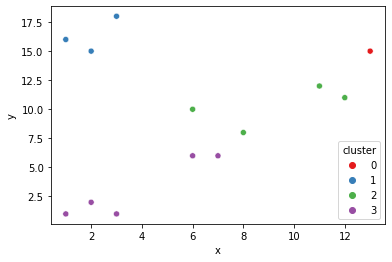

In [212]:
sns.scatterplot(data=df_random_init, x="x", y="y", hue="cluster", palette="Set1")

## These clusters were initialized using the kmeans++ algorithm. In short, we choose initial clusters that maximize the distance of each new cluster from the perviously chosen clusters. This ensures that we don't wind up with clusters near each other when starting out.

<AxesSubplot:xlabel='x', ylabel='y'>

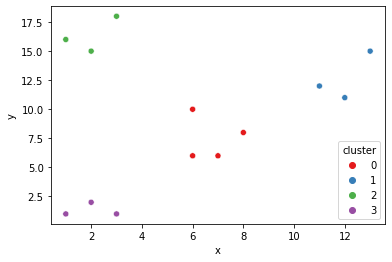

In [213]:
sns.scatterplot(data=df_kplus_init, x="x", y="y", hue="cluster", palette="Set1")